#Car Price Prediction Analysis

Cell 1: Import Libraries

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

Cell 2: Load Dataset and Add Column Names

In [27]:
# Define column names based on the dataset description
column_names = [
    'symboling', 'normalized_losses', 'make', 'fuel_type', 'aspiration',
    'num_doors', 'body_style', 'drive_wheels', 'engine_location',
    'wheel_base', 'length', 'width', 'height', 'curb_weight',
    'engine_type', 'num_cylinders', 'engine_size', 'fuel_system',
    'bore', 'stroke', 'compression_ratio', 'horsepower', 'peak_rpm',
    'city_mpg', 'highway_mpg', 'price'
]

# Load the dataset
df = pd.read_csv('imports-85.data.txt', names=column_names, na_values='?')

# Display the first few rows
print(df.head())

   symboling  normalized_losses         make fuel_type aspiration num_doors  \
0          3                NaN  alfa-romero       gas        std       two   
1          3                NaN  alfa-romero       gas        std       two   
2          1                NaN  alfa-romero       gas        std       two   
3          2              164.0         audi       gas        std      four   
4          2              164.0         audi       gas        std      four   

    body_style drive_wheels engine_location  wheel_base  ...  engine_size  \
0  convertible          rwd           front        88.6  ...          130   
1  convertible          rwd           front        88.6  ...          130   
2    hatchback          rwd           front        94.5  ...          152   
3        sedan          fwd           front        99.8  ...          109   
4        sedan          4wd           front        99.4  ...          136   

   fuel_system  bore  stroke compression_ratio horsepower  pea

Cell 3: Check for Missing Values

In [28]:
# Check for missing values
print(df.isnull().sum())

symboling             0
normalized_losses    41
make                  0
fuel_type             0
aspiration            0
num_doors             2
body_style            0
drive_wheels          0
engine_location       0
wheel_base            0
length                0
width                 0
height                0
curb_weight           0
engine_type           0
num_cylinders         0
engine_size           0
fuel_system           0
bore                  4
stroke                4
compression_ratio     0
horsepower            2
peak_rpm              2
city_mpg              0
highway_mpg           0
price                 4
dtype: int64


Cell 4: Handle Missing Values

In [29]:
# Handle missing values
# 1. Fill 'normalized_losses' with the median value
df['normalized_losses'].fillna(df['normalized_losses'].median(), inplace=True)

# 2. Fill 'num_doors' with the most common value
most_common_doors = df['num_doors'].mode()[0]
df['num_doors'].fillna(most_common_doors, inplace=True)

# 3. Fill 'bore', 'stroke', 'horsepower', 'peak_rpm' with median values
df['bore'].fillna(df['bore'].median(), inplace=True)
df['stroke'].fillna(df['stroke'].median(), inplace=True)
df['horsepower'].fillna(df['horsepower'].median(), inplace=True)
df['peak_rpm'].fillna(df['peak_rpm'].median(), inplace=True)

# Verify missing values are handled
print("Missing values after cleaning:\n", df.isnull().sum())

Missing values after cleaning:
 symboling            0
normalized_losses    0
make                 0
fuel_type            0
aspiration           0
num_doors            0
body_style           0
drive_wheels         0
engine_location      0
wheel_base           0
length               0
width                0
height               0
curb_weight          0
engine_type          0
num_cylinders        0
engine_size          0
fuel_system          0
bore                 0
stroke               0
compression_ratio    0
horsepower           0
peak_rpm             0
city_mpg             0
highway_mpg          0
price                4
dtype: int64


<ipython-input-29-c98c639d4415>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['normalized_losses'].fillna(df['normalized_losses'].median(), inplace=True)
<ipython-input-29-c98c639d4415>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(v

Cell 5: Save the Cleaned Dataset

In [30]:
# Save the cleaned dataset
df.to_csv("cleaned_car_data.csv", index=False)

Cell 6: Feature Correlation Heatmap

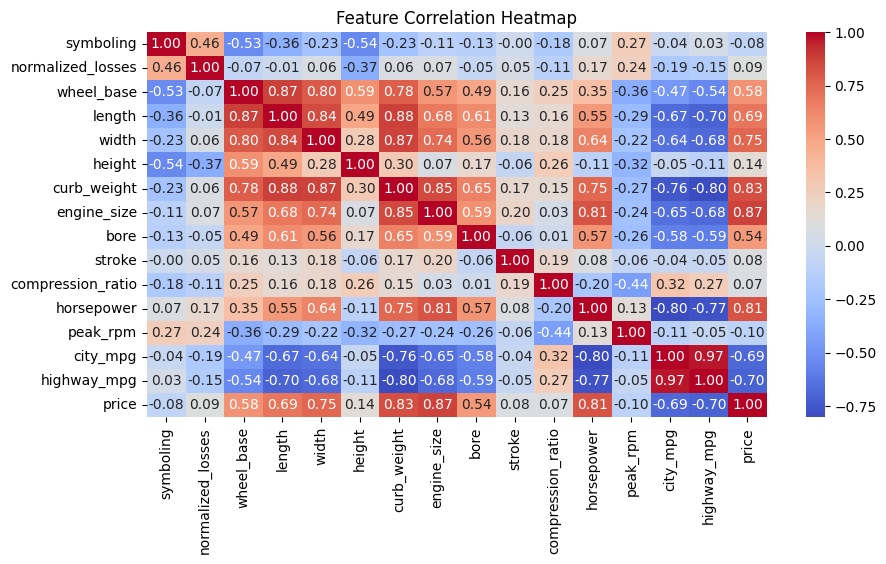

In [31]:
# Feature Correlation Heatmap With Numerical Variables
numeric_df = df.select_dtypes(include=['number'])
plt.figure(figsize=(10, 5))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()

Cell 7: Car Price by Body Style

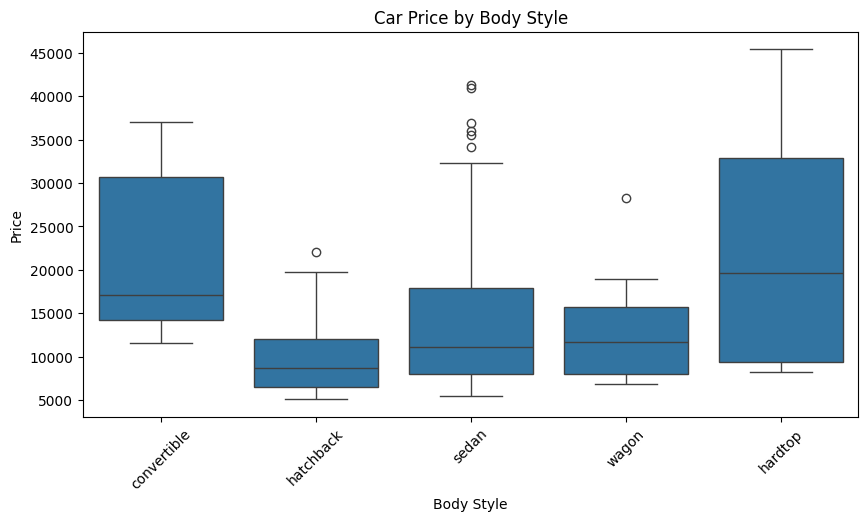

In [32]:
# Car Price by Body Style
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['body_style'], y=df['price'])
plt.title('Car Price by Body Style')
plt.xlabel('Body Style')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

Cell 8: Top 10 Car Brands by Frequency

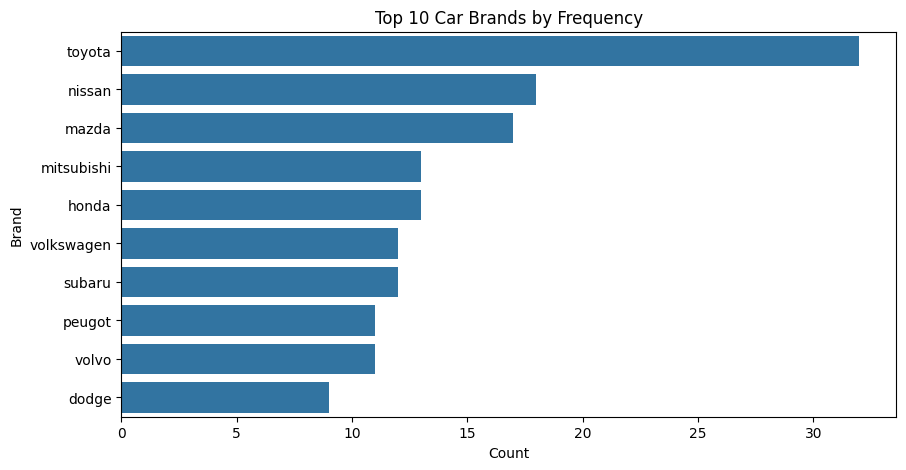

In [33]:
# Top 10 Car Brands by Frequency
plt.figure(figsize=(10, 5))
sns.countplot(y=df['make'], order=df['make'].value_counts().index[:10])
plt.title('Top 10 Car Brands by Frequency')
plt.xlabel('Count')
plt.ylabel('Brand')
plt.show()

Cell 9: Horsepower vs. Price

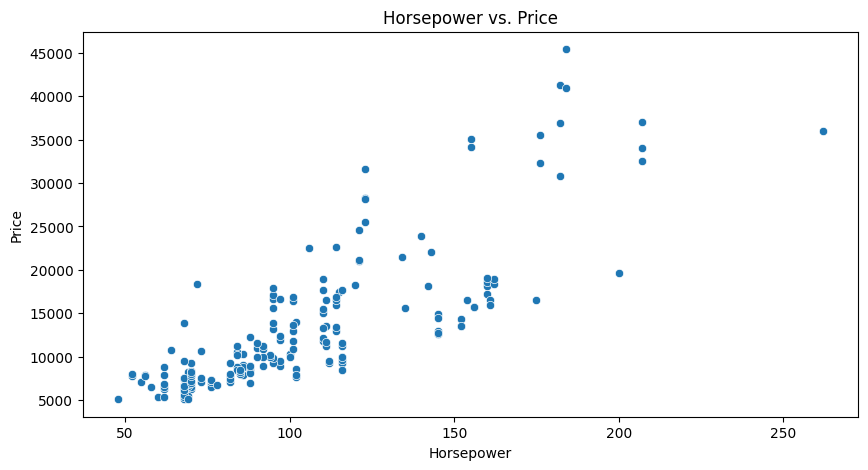

In [34]:
# Horsepower vs. Price
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df['horsepower'], y=df['price'])
plt.title('Horsepower vs. Price')
plt.xlabel('Horsepower')
plt.ylabel('Price')
plt.show()

Cell 10: Distribution of Car Prices

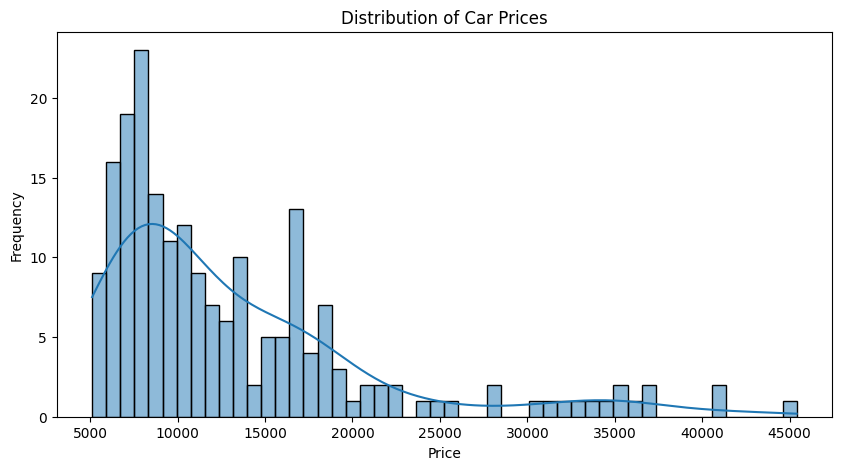

In [35]:
# Distribution of Car Prices
plt.figure(figsize=(10, 5))
sns.histplot(df['price'], bins=50, kde=True)
plt.title('Distribution of Car Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

Cell 11: Feature Engineering

In [42]:
# Feature Engineering
df['mpg_ratio'] = df['highway_mpg'] / df['city_mpg']

Cell 12: Selecting Relevant Features & Target

In [43]:
# Selecting Relevant Features & Target
features = [
    'wheel_base', 'length', 'width', 'height', 'curb_weight',
    'engine_size', 'bore', 'stroke', 'compression_ratio',
    'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg',
    'mpg_ratio', 'make', 'fuel_type', 'aspiration', 'num_doors',
    'body_style', 'drive_wheels'
]
X = df[features]
y = df['price']

# Drop rows where the target variable (price) is NaN
X = X[~y.isna()]
y = y[~y.isna()]

Cell 13: One-Hot Encoding for Categorical Variables

In [44]:
# One-Hot Encoding for Categorical Variables
X = pd.get_dummies(X, columns=['make', 'fuel_type', 'aspiration', 'num_doors', 'body_style', 'drive_wheels'], drop_first=True)

Cell 14: Train-Test Split

In [45]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Cell 15: Standardizing Numerical Features

In [46]:
# Standardizing Numerical Features
scaler = StandardScaler()
numeric_features = [
    'wheel_base', 'length', 'width', 'height', 'curb_weight',
    'engine_size', 'bore', 'stroke', 'compression_ratio',
    'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg', 'mpg_ratio'
]
X_train[numeric_features] = scaler.fit_transform(X_train[numeric_features])
X_test[numeric_features] = scaler.transform(X_test[numeric_features])

Cell 16: Model Training

In [47]:
# Model Training
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

Cell 17: Model Evaluation

In [48]:
# Model Evaluation
y_pred = model.predict(X_test)
print("Model Performance:")
print(f"MAE: {mean_absolute_error(y_test, y_pred)}")
print(f"MSE: {mean_squared_error(y_test, y_pred)}")
print(f"R2 Score: {r2_score(y_test, y_pred)}\n")

Model Performance:
MAE: 1700.162699186992
MSE: 7312771.0328956945
R2 Score: 0.9402291466408084



Cell 18: Function to Predict Car Price

In [49]:
# Function to Predict Car Price
def predict_car_price(input_data):
    input_df = pd.DataFrame([input_data])
    input_df = pd.get_dummies(input_df, columns=['make', 'fuel_type', 'aspiration', 'num_doors', 'body_style', 'drive_wheels'], drop_first=True)

    # Ensure all columns are present
    missing_cols = set(X_train.columns) - set(input_df.columns)
    for col in missing_cols:
        input_df[col] = 0  # Add missing columns with default value 0

    input_df = input_df[X_train.columns]  # Ensure correct order
    input_df[numeric_features] = scaler.transform(input_df[numeric_features])  # Scale numerical values

    return model.predict(input_df)[0]

Cell 19: Prediction

In [50]:
# Prediction
new_car = {
    'wheel_base': 88.6, 'length': 168.8, 'width': 64.1, 'height': 48.8,
    'curb_weight': 2548, 'engine_size': 130, 'bore': 3.47, 'stroke': 2.68,
    'compression_ratio': 9.0, 'horsepower': 111, 'peak_rpm': 5000,
    'city_mpg': 21, 'highway_mpg': 27, 'mpg_ratio': 27 / 21,
    'make': 'alfa-romero', 'fuel_type': 'gas', 'aspiration': 'std',
    'num_doors': 'two', 'body_style': 'convertible', 'drive_wheels': 'rwd'
}

predicted_price = predict_car_price(new_car)
print(f"Predicted Car Price: ${predicted_price:,.2f}")

Predicted Car Price: $14,127.91
